In [3]:
# read csv
import pandas as pd
import skimage.io
import skimage.feature
import skimage.transform
import os
import matplotlib.pyplot as plt

data_dir = "data"

df = pd.read_csv(os.path.join(data_dir, "items.csv"), sep=";")
print(df.shape[0])
df.dropna(inplace=True, ignore_index=True)
print(df.shape[0])
df = df.astype({"x1": int, "y1": int, "x2": int, "y2": int})
df = df.sample(n=20, random_state=42).reset_index(drop=True)
df

665
665


img_dir  label    x1     y1    x2     y2
0    20/020_27.jpg     20   984   6978  1892   7886
1    20/020_31.jpg     20  3392  11742  5344  13694
2     5/005_53.jpg      5  1952   5912  3032   6992
3     2/002_30.jpg      2   698   1920  1986   3208
4      5/005_2.jpg      5  1949   5867  2959   6877
5    20/020_99.jpg     20  2984   5504  3880   6400
6   500/500_47.jpg    500  3002   2132  4198   3328
7     5/005_46.jpg      5  4117  11855  6143  13881
8   500/500_20.jpg    500  3436   2306  5964   4834
9    10/010_42.jpg     10  5392  10574  7104  12286
10   10/010_34.jpg     10   502   3098   938   3534
11    5/005_14.jpg      5  1922   5982  2934   6994
12   20/020_91.jpg     20  2942   5426  3906   6390
13   100/100_4.jpg    100  5175    653  7477   2955
14    2/002_14.jpg      2   320    966   968   1614
15   10/010_18.jpg     10  1968   6126  2800   6958
16    10/010_1.jpg     10   963   3017  1377   3431
17  100/100_62.jpg    100  3938   2918  6158   5138
18    2/002_17.jpg      2  1323   3931  3905   6513
19  100/100_22.jpg    100  5200   2952  7808   5560

Corrupt JPEG data: 3 extraneous bytes before marker 0xd4


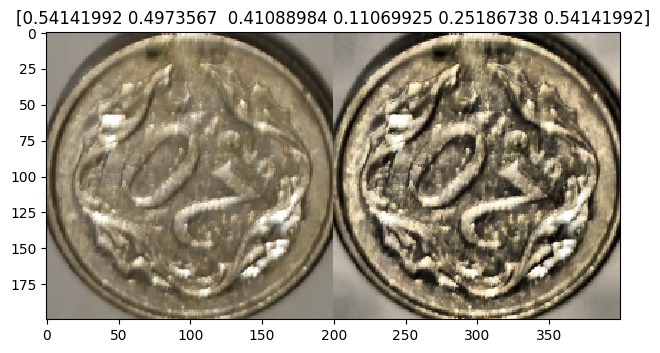

Corrupt JPEG data: 1 extraneous bytes before marker 0xd1


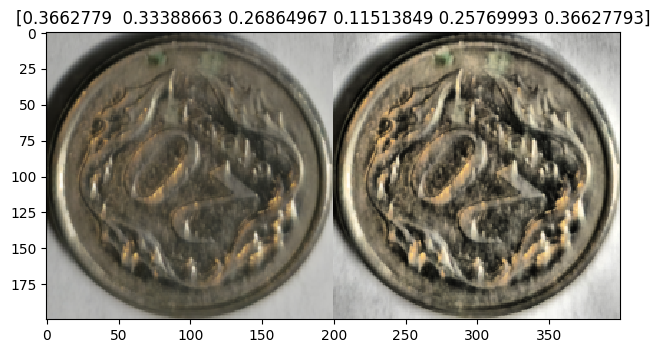

Corrupt JPEG data: 2 extraneous bytes before marker 0xd6


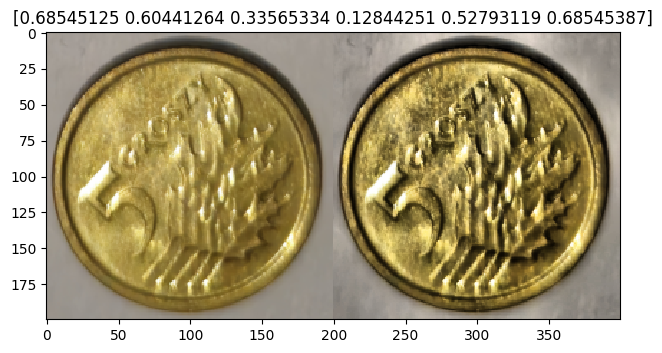

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


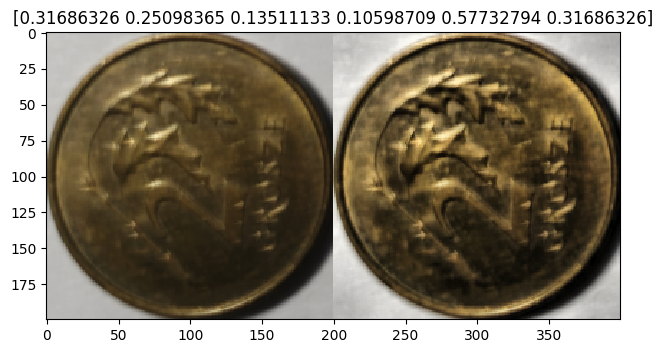

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


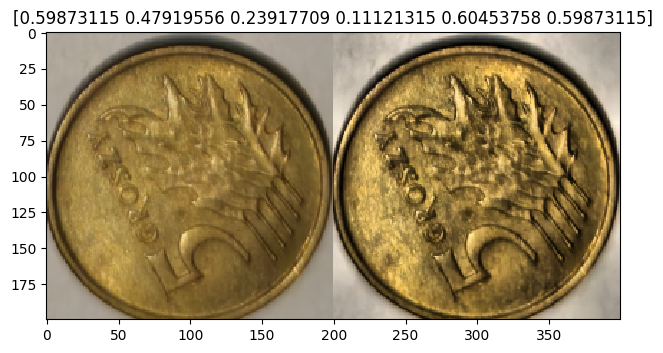

Corrupt JPEG data: 2 extraneous bytes before marker 0xd4


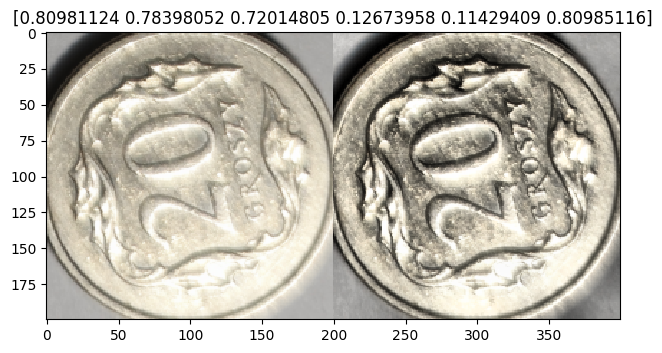

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


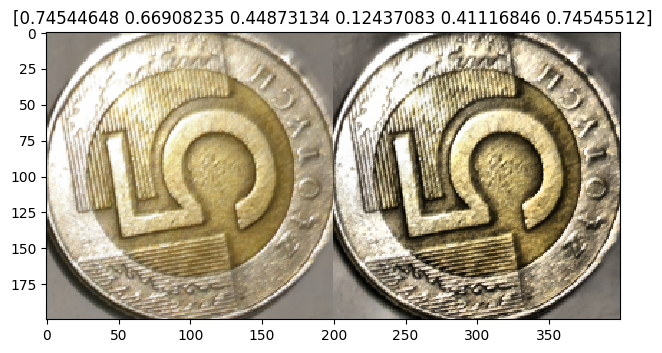

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


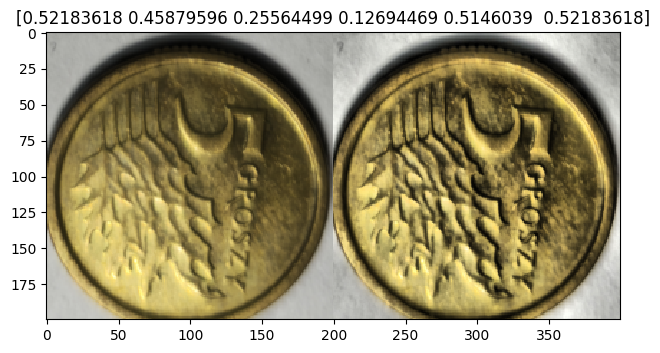

Corrupt JPEG data: 1 extraneous bytes before marker 0xd1


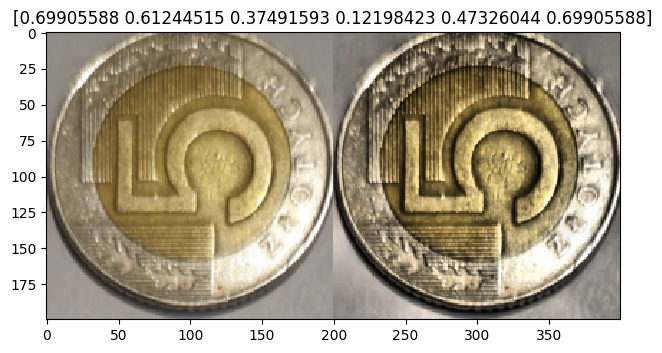

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


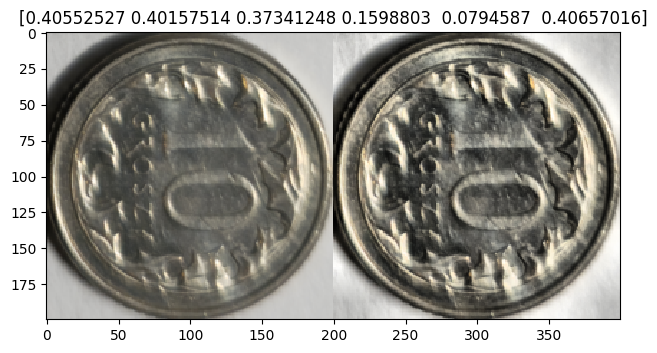

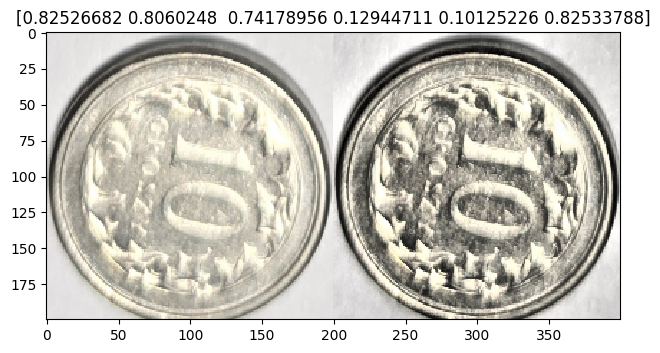

Corrupt JPEG data: 6 extraneous bytes before marker 0xd1


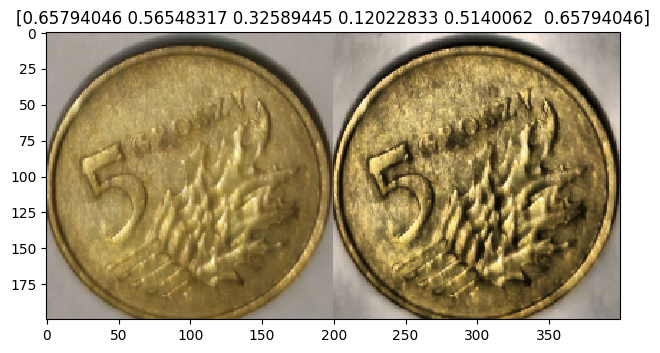

Corrupt JPEG data: 6 extraneous bytes before marker 0xd7


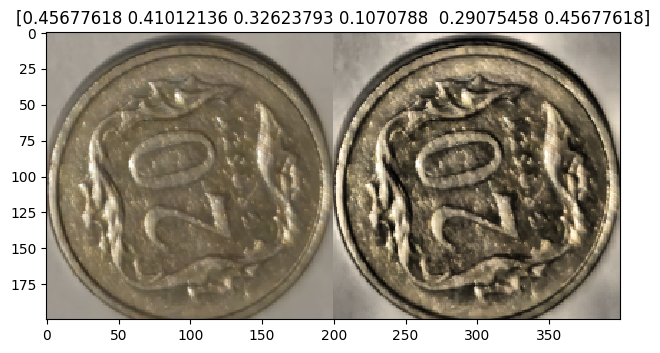

Corrupt JPEG data: 1 extraneous bytes before marker 0xd1


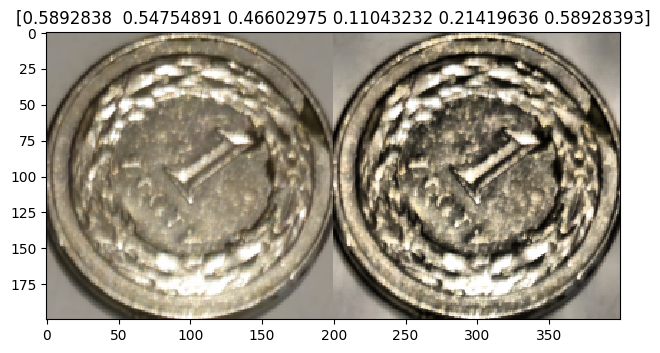

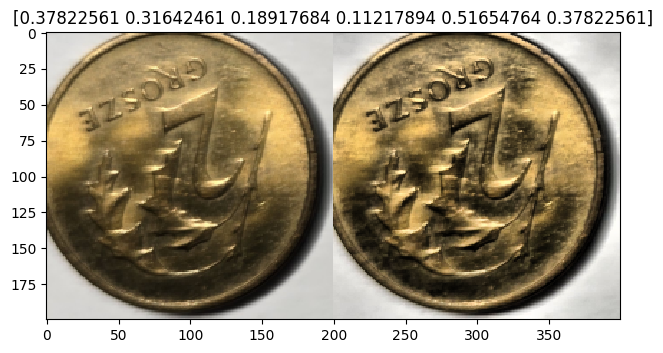

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


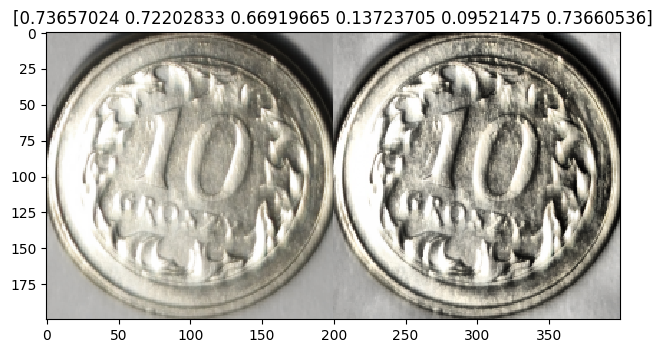

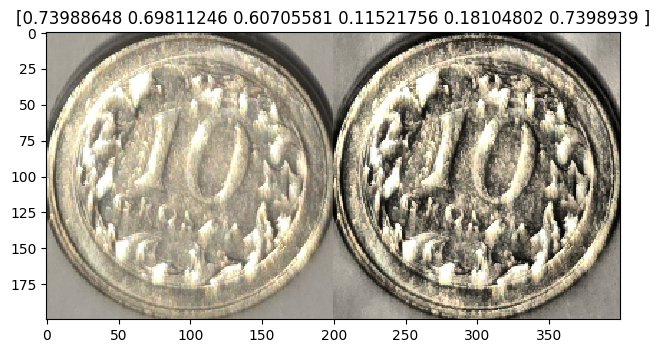

Corrupt JPEG data: 1 extraneous bytes before marker 0xd6


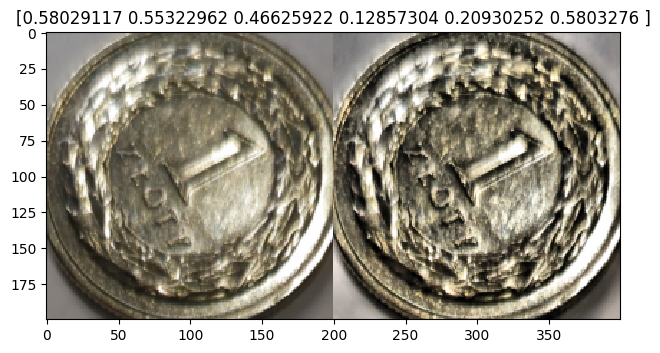

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


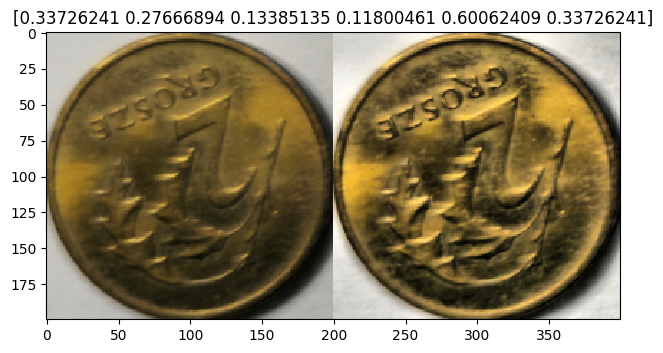

Corrupt JPEG data: 1 extraneous bytes before marker 0xd1


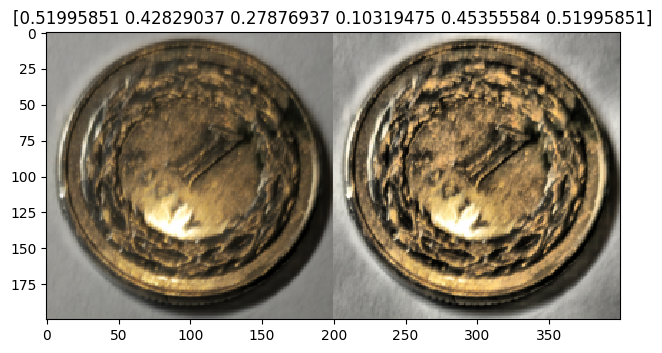

In [4]:
from aoc.utils import (
    extract_coin,
    extract_color_features,
    gaussuian_mask,
    convolve_mask,
)
from skimage.color import rgba2rgb, rgb2gray
from tqdm import tqdm
import cv2 as cv
import numpy as np

resize_shape = (200, 200)
mask_sigma = 15
mask = gaussuian_mask(resize_shape, mask_sigma)
orientations = 8
pixels_per_cell = (16, 16)
cells_per_block = (3, 3)

for index, row in df.iterrows():
    bounding_box = (row["x1"], row["y1"], row["x2"], row["y2"])

    image_path = os.path.join(data_dir, row["img_dir"])
    image = cv.imread(image_path)

    image = image[:, :, ::-1]

    x1, y1, x2, y2 = bounding_box

    image = extract_coin(image, bounding_box, resize_shape)

    color_features = extract_color_features(image)

    adahist = skimage.exposure.equalize_adapthist(image)

    concated = np.concatenate((image, adahist), axis=1)

    skimage.io.imshow(concated)
    plt.title(color_features)
    plt.show()